# Analysis of results with the simple configuration

## Setup
### Imports

In [64]:
# imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [65]:
results_path = 'results\\sudden_3_attribute_values\\10000\\100_iter_results.csv'

Create the results table

In [66]:
# load the results csv file
results_df_raw = pd.read_csv(results_path)
display(results_df_raw.head())

,config_window_generator_type,config_window_size,config_threshold,config_max_distance,config_slide_by,config_proportional_phi,number_of_correct_detections,number_of_true_changes,number_of_detections,precision,recall,f1_score,mean_lag,all_lags,config_event_log_file_path,compute_time,experiment
0,fixed,100,0.05,300,10,0.25,5,5,33,0.151515,1.0,0.263158,27.0,"[29, 19, 19, 9, 59]",data\synthetic\attribute_drift\sudden_3_attrib...,3.567803,initial
1,fixed,100,0.05,300,10,0.50,5,5,10,0.500000,1.0,0.666667,27.0,"[29, 19, 19, 9, 59]",data\synthetic\attribute_drift\sudden_3_attrib...,3.443985,initial
2,fixed,100,0.05,300,10,1.00,5,5,5,1.000000,1.0,1.000000,27.0,"[29, 19, 19, 9, 59]",data\synthetic\attribute_drift\sudden_3_attrib...,3.453729,initial
3,fixed,100,0.05,300,20,0.25,5,5,29,0.172414,1.0,0.294118,31.0,"[39, 19, 19, 19, 59]",data\synthetic\attribute_drift\sudden_3_attrib...,1.775957,initial
4,fixed,100,0.05,300,20,0.50,5,5,9,0.555556,1.0,0.714286,31.0,"[39, 19, 19, 19, 59]",data\synthetic\attribute_drift\sudden_3_attrib...,1.826242,initial


In [67]:
# drop some columns that are not needed
drop_columns = ['config_event_log_file_path', 'all_lags']
results_df = results_df_raw.drop(columns=drop_columns)

print(results_df.columns)

# rename existing columns
results_df.columns= ['window generator', 'window size',
       'threshold', 'max distance',
       'slide by', 'proportional phi', 'number of correct detections',
       'number of true changes', 'number of detections', 'precision', 'recall',
       'f1 score', 'lag', 'compute time', 'experiment']

# define the configuration columns to group results on 
config_columns = ['window generator', 'window size',
       'threshold', 'max distance', 'proportional phi',
       'slide by', 'experiment']

results_df = results_df.groupby(by=config_columns).agg({
    'number of correct detections': ['sum'],
    'number of true changes': ['sum'],
    'number of detections': ['sum'],
    'precision': ['mean'],
    'recall': ['mean'],
    'f1 score': ['mean'],
    'lag': ['mean'],
    'compute time': ['mean']
})

results_df = results_df.reset_index()

# recalculate precision, recall and f1
results_df[('precision', 'true')] = results_df['number of correct detections'] / results_df['number of detections']
results_df[('recall', 'true')] = results_df['number of correct detections'] / results_df['number of true changes']
results_df[('f1 score', 'true')] = 2 / (1/results_df[('precision', 'true')] + 1/results_df[('recall', 'true')])

results_df

Index(['config_window_generator_type', 'config_window_size',
       'config_threshold', 'config_max_distance', 'config_slide_by',
       'config_proportional_phi', 'number_of_correct_detections',
       'number_of_true_changes', 'number_of_detections', 'precision', 'recall',
       'f1_score', 'mean_lag', 'compute_time', 'experiment'],
      dtype='object')


,window generator,window size,threshold,max distance,proportional phi,slide by,experiment,number of correct detections,number of true changes,number of detections,precision,recall,f1 score,lag,compute time,precision,recall,f1 score
,,,,,,,,sum,sum,sum,mean,mean,mean,mean,mean,true,true,true
0,adaptive,100,0.05,300,0.25,10,initial,497,500,3750,0.135289,0.994,0.237614,40.047000,3.523490,0.132533,0.994,0.233882
1,adaptive,100,0.05,300,0.25,20,initial,496,500,3358,0.152103,0.992,0.262748,38.357000,1.998247,0.147707,0.992,0.257128
2,adaptive,100,0.05,300,0.50,10,initial,497,500,1514,0.342284,0.994,0.505038,43.219000,3.522707,0.328269,0.994,0.493545
3,adaptive,100,0.05,300,0.50,20,initial,495,500,1401,0.373404,0.990,0.536050,40.445667,2.006554,0.353319,0.990,0.520779
4,adaptive,100,0.05,300,1.00,10,initial,482,500,492,0.981833,0.964,0.970470,44.694000,3.527822,0.979675,0.964,0.971774
5,adaptive,100,0.05,300,1.00,20,initial,478,500,522,0.926798,0.956,0.936137,40.335833,2.006928,0.915709,0.956,0.935421
6,adaptive,150,0.05,300,0.25,10,initial,500,500,2842,0.181853,1.000,0.306336,51.520000,4.211406,0.175932,1.000,0.299222
7,adaptive,150,0.05,300,0.25,20,initial,500,500,3665,0.140330,1.000,0.245362,41.050000,2.343835,0.136426,1.000,0.240096
8,adaptive,150,0.05,300,0.50,10,initial,500,500,951,0.549414,1.000,0.702032,57.530000,4.196563,0.525762,1.000,0.689180


In [68]:
# simplify by deleting non-interesting columns and getting rid of multiindex
drop_columns = [('precision', 'mean'), ('recall', 'mean'), ('f1 score', 'mean'), 
                ('number of correct detections', 'sum'), ('number of true changes', 'sum'), 
                ('number of detections', 'sum')]

all_results = results_df.drop(columns=drop_columns)
all_results.columns = all_results.columns.get_level_values(0)

# reorder columns
ordered_columns = config_columns + ['precision', 'recall', 'f1 score', 'lag', 'compute time']

all_results = all_results[ordered_columns]

# create the simple results dataframe
simple_results_df = all_results.query("`experiment` == 'initial'")#population comparer` == "KS test")[simple_results_df['slide by'] == 5 or simple_results_df['slide by'] == 10]

# drop the threshold, experiment and max distance (they are always the same)
simple_results_df = simple_results_df.drop(columns=['experiment', 'threshold', 'max distance'])

# set the configuration columns as index
all_results = all_results.set_index(config_columns)
simple_results_df = simple_results_df.set_index(['window generator', 'window size', 'proportional phi', 'slide by'])

## Analysis

### Get an overview of the simple results table
Show the table, write to Latex.

Also, produce a facet grid plot.

In [69]:
simple_results_df

precision  recall  \
window generator window size proportional phi slide by                      
adaptive         100         0.25             10         0.132533   0.994   
                                              20         0.147707   0.992   
                             0.50             10         0.328269   0.994   
                                              20         0.353319   0.990   
                             1.00             10         0.979675   0.964   
                                              20         0.915709   0.956   
                 150         0.25             10         0.175932   1.000   
                                              20         0.136426   1.000   
                             0.50             10         0.525762   1.000   
                                              20         0.409836   1.000   
                             1.00             10         0.991984   0.990   
                                              20         0.987976   0.986   
                 200         0.25             10         0.222321   1.000   
                                              20         0.229885   1.000   
                             0.50             10         0.576701   1.000   
                                              20         0.494071   1.000   
                             1.00             10         0.991597   0.708   
                                              20         0.986301   0.864   
fixed            100         0.25             10         0.131593   0.988   
                                              20         0.146675   0.988   
                             0.50             10         0.325182   0.984   
                                              20         0.350927   0.984   
                             1.00             10         0.979550   0.958   
                                              20         0.918251   0.966   
                 150         0.25             10         0.175088   0.998   
                                              20         0.136004   0.998   
                             0.50             10         0.523061   0.998   
                                              20         0.407015   0.998   
                             1.00             10         0.991952   0.986   
                                              20         0.987976   0.986   
                 200         0.25             10         0.221828   1.000   
                                              20         0.229991   1.000   
                             0.50             10         0.575374   1.000   
                                              20         0.493097   1.000   
                             1.00             10         0.994012   0.996   
                                              20         0.988095   0.996   

                                                        f1 score        lag  \
window generator window size proportional phi slide by                        
adaptive         100         0.25             10        0.233882  40.047000   
                                              20        0.257128  38.357000   
                             0.50             10        0.493545  43.219000   
                                              20        0.520779  40.445667   
                             1.00             10        0.971774  44.694000   
                                              20        0.935421  40.335833   
                 150         0.25             10        0.299222  51.520000   
                                              20        0.240096  41.050000   
                             0.50             10        0.689180  57.530000   
                                              20        0.581395  49.940000   
                             1.00             10        0.990991  58.002500   
                                              20        0.986987  50.255000   
                 200   

In [70]:
# write simple results to latex for results table
path = 'results/latex/simple_results_table.tex'
with open(path, 'w') as file:
    simple_results_df.to_latex(file, float_format="%.2f", caption='Results with Simple Configuration', label='tab:results_simple')

C:\Users\Lennart\AppData\Local\Temp\ipykernel_33408\1510524082.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  simple_results_df.to_latex(file, float_format="%.2f", caption='Results with Simple Configuration', label='tab:results_simple')


In [71]:
# get a generatl statistic across all configurations
general_stats = simple_results_df.describe()

general_stats = general_stats.loc[['mean', 'std', 'min', 'max']]

display(general_stats)

# write general stats to latex
path = 'results/latex/simple_general_stats.tex'
with open(path, 'w') as file:
    general_stats.to_latex(file, float_format="%.2f", caption='Aggregated results with Simple Configuration', label='tab:results_simple_agg')

# also write to csv for comparison with complex configuration
path = 'results/csv/simple_general_stats.csv'
with open(path, 'w') as file:
    general_stats.to_csv(file)

,precision,recall,f1 score,lag,compute time
mean,0.532269,0.979500,0.621531,40.403634,3.156774
std,0.343087,0.052523,0.283350,10.344060,0.997106
min,0.131593,0.708000,0.232252,25.645000,1.880710
max,0.994012,1.000000,0.995005,66.026000,4.844642


C:\Users\Lennart\AppData\Local\Temp\ipykernel_33408\2700325523.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  general_stats.to_latex(file, float_format="%.2f", caption='Aggregated results with Simple Configuration', label='tab:results_simple_agg')


In [72]:
# Get the result with the highest f1 score
df = simple_results_df.reset_index()
df.sort_values('f1 score', ascending=False)[:3]

,window generator,window size,proportional phi,slide by,precision,recall,f1 score,lag,compute time
34,fixed,200,1.0,10,0.994012,0.996,0.995005,35.9550,4.494431
35,fixed,200,1.0,20,0.988095,0.996,0.992032,39.7500,2.496180
10,adaptive,150,1.0,10,0.991984,0.990,0.990991,58.0025,4.204367


In [73]:
df = simple_results_df.reset_index()
df_corr = df.corr()[['precision', 'recall', 'f1 score', 'lag', 'compute time']]
df_corr = df_corr.loc[['window size', 'proportional phi', 'slide by']]
display(df_corr)

# export table to latex
path = 'results/latex/simple_correlations.tex'
with open(path, 'w') as file:
    df_corr.to_latex(file, float_format="%.2f", caption='Correlations of Settings', label='tab:correlations_settings')

,precision,recall,f1 score,lag,compute time
window size,0.130122,-0.127441,0.143234,0.319868,0.395212
proportional phi,0.984453,-0.430050,0.958419,0.130627,-0.001141
slide by,-0.042958,0.078309,-0.032619,-0.088178,-0.901984


C:\Users\Lennart\AppData\Local\Temp\ipykernel_33408\2348395012.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_corr.to_latex(file, float_format="%.2f", caption='Correlations of Settings', label='tab:correlations_settings')


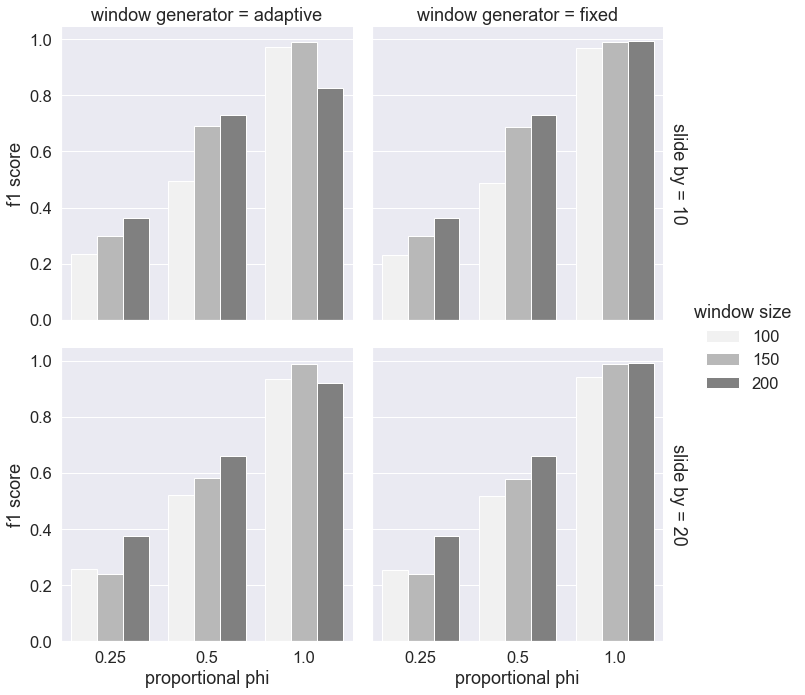

In [74]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="proportional phi", y="f1 score",
                hue="window size", col="window generator",
                row="slide by",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [75]:
# create an additional table that shows the result with different window generators 
# as the difference is hard to tell from the table
df.groupby(['window generator']).mean()['f1 score']

window generator
adaptive    0.615453
fixed       0.627609
Name: f1 score, dtype: float64

- Window generator is not strongly correlated (slightly better score for the adaptive window generator)
- KS test is far superior than the chi square test (more robust, better precision, see overview table)
- larger slide by is preferred
- smaller window size is preferred


The positive influence of "slide by" on f1 score is hard to understand. Therefore, additional runs with different slide by settings where performed.

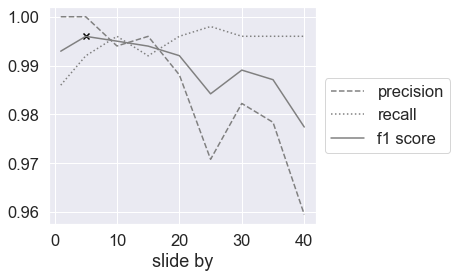

In [81]:
slide_by_df = all_results.query("`experiment` == 'slide_bys'")

# get the slide_by configuration into the index
slide_by_df = slide_by_df.reset_index()
slide_by_df.index = slide_by_df['slide by']

# drop the experiment column
slide_by_df = slide_by_df.drop(columns=['experiment'])

# only get precision, recall, f1, mean_lag and compute time
slide_by_df = slide_by_df[['slide by', 'precision', 'recall', 'f1 score', 'lag', 'compute time']]
slide_by_df

# show precision, recall and f1 in a plot
precision_values = slide_by_df['precision']
recall_values = slide_by_df['recall']
f1_values = slide_by_df['f1 score']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(precision_values.index, precision_values, label='precision', ls='dashed', color='grey')
ax.plot(recall_values.index, recall_values, label='recall', ls='dotted', color='grey')
ax.plot(f1_values.index, f1_values, label='f1 score', ls='solid', color='grey')
plt.xlabel("slide by")

# add the maximum f1-score with a label
loc_max_f1 = slide_by_df['f1 score'].idxmax()
max_f1 = slide_by_df['f1 score'][loc_max_f1]

# add the label to the graph
ax.scatter(x=[loc_max_f1], 
            y=[max_f1], 
            marker='x', 
            color='black')
ax.annotate(f'Max: ({loc_max_f1}, {max_f1:.2})', xy=(loc_max_f1, max_f1+0.01))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white')

plt.show()

We can clearly see how different settings of "slide by" impact precision and recall. For low "slide by" settings, there are many false positives. Hence, the precision is very low. The more it slides, the higher the precision, while recall decreases (more false negatives).

In conclusion, higher "slide by" settings make the approach more robust but also less sensitive. A value of 15 to 25 appears to strike a balance between the two.

Next, we quickly confirm whether the runtime really decreases linearly with increasing "slide by".

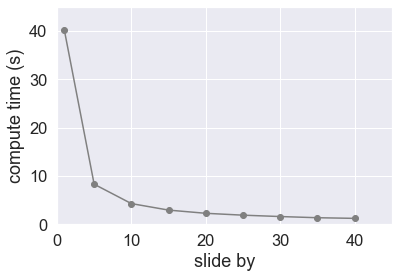

In [85]:
slide_by_df['compute time'].plot(color='grey', marker='o')

plt.ylabel('compute time (s)')
plt.ylim(0, 45)
plt.xlim(0, 45)
plt.show()


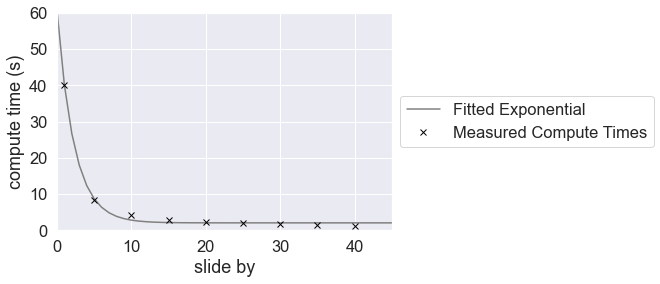

In [86]:
# attempt to fit an exponential function to the compute time - "slide by" graph
x = slide_by_df['compute time'].index
y = slide_by_df['compute time']

def exp_function(x, a, k, b):
    return a * np.exp(-k*x) + b

p0 = (1.,0.1,1.)
opt, pcov = curve_fit(exp_function, x, y, p0)

# get optimization result into variables
a, k, b = opt

x2 = np.arange(0, 50, step=1)
y2 = exp_function(x2, a, k, b)

fig, ax = plt.subplots()

ax.plot(x2, y2, color='grey', label='Fitted Exponential')
ax.plot(x, y, 'x', color='black', label='Measured Compute Times')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white')

plt.ylabel('compute time (s)')
plt.xlabel('slide by')
plt.ylim(0, 60)
plt.xlim(0, 45)
plt.show()

Although the number of computations decreases linarly with "slide by", the compute time decreases exponentially.

### Lag

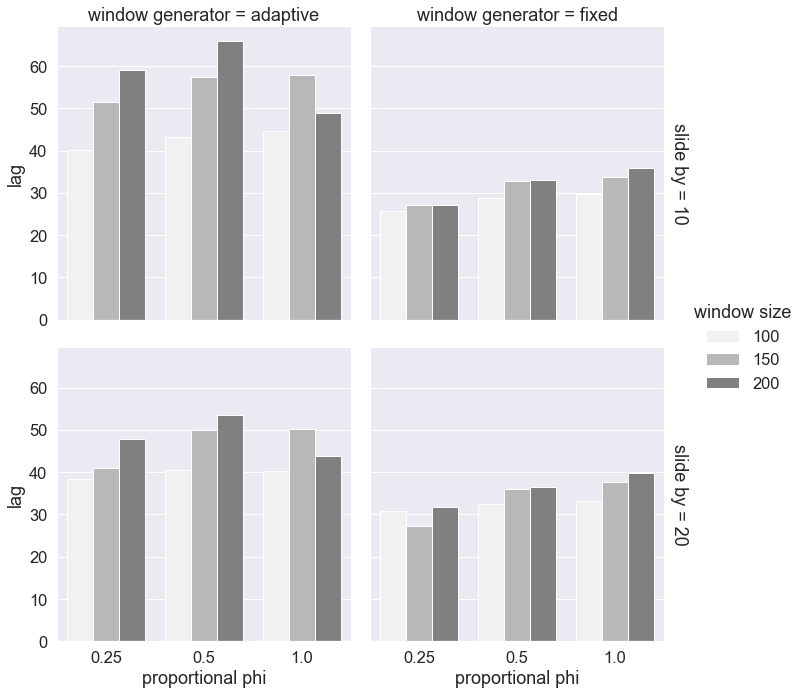

In [87]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="proportional phi", y="lag",
                hue="window size", col="window generator",
                row="slide by",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [88]:
# create an additional table that shows the result with different window generators 
# as the difference is hard to tell from the table
df.groupby(['window generator']).mean()['lag']

window generator
adaptive    48.591713
fixed       32.215556
Name: lag, dtype: float64

- we observe no significant difference between the adaptive or fixed window generator (adaptive is a bit better)
- Chi Squared has a lower lag (probably over sensitive)
- smaller window size equals lower lag
- larger slide by results in marginally smaller lag

### Compute Time


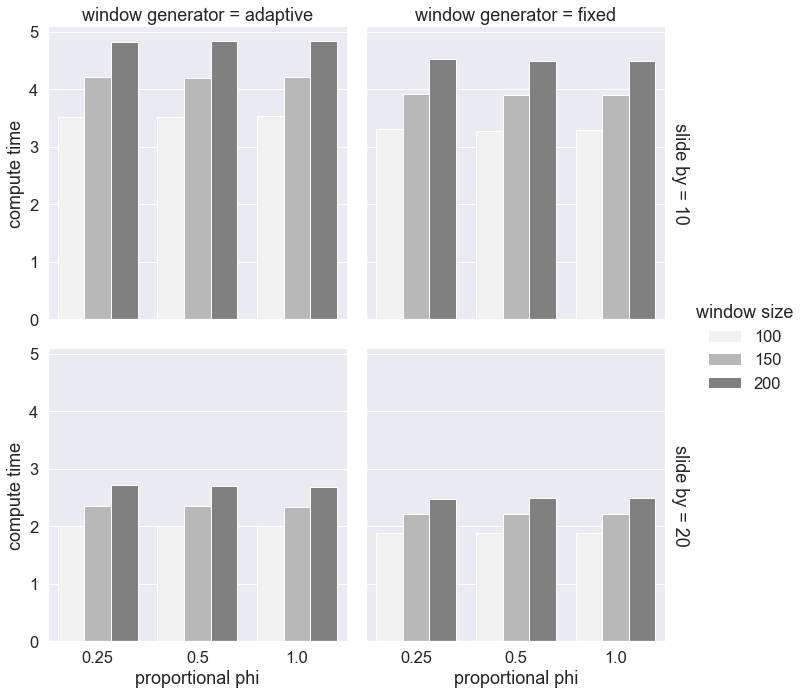

In [89]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="proportional phi", y="compute time",
                hue="window size", col="window generator",
                row="slide by",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [90]:
f"Compute times where between {min(df['compute time']):.2f} and {max(df['compute time']):.2f} seconds."

'Compute times where between 1.88 and 4.84 seconds.'

- Again no differences between adaptive and fixed window generator
- Chi Squared test much more computationally heavy than KS test
- Decreased window size decreases compute times greatly (for the KS test the compute time is directly proportinal to the computation time)
- Compute time is directly proportional to the slide by, the larger the slide, the less computations.